# BIKE SHARING DEMAND

<img src='bike.jpg'>

### Introduction

### About the Datasets

In [5]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl  
import matplotlib.pyplot as plt 
import seaborn as sns  
import missingno as mn
%matplotlib inline 
from datetime import datetime

plt.rcParams['figure.figsize'] = [8, 4]

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [6]:
df=pd.read_csv('store_sharing.csv')

In [7]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [11]:
df.rename(columns={'cnt':'total_count', 't1':'temp', 't2':'feel_temp', 'hum':'humidity'}, inplace=True)
df.columns
#anlamamiza yardimci olmasi icin bazi sütun isimlerini degistiriyoruz.

Index(['timestamp', 'total_count', 'temp', 'feel_temp', 'humidity',
       'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [12]:
# Datetime sütunu object göründügü icin sütundaki tarihleri degistiriyoruz.
df.timestamp = pd.to_datetime(df.timestamp)

In [13]:
df['year'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.year
df['month'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.month
df['day'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.day
df['day_of_week'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.dayofweek
df['hour'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.hour

In [14]:
df.head()

,timestamp,total_count,temp,feel_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   total_count   17414 non-null  int64         
 2   temp          17414 non-null  float64       
 3   feel_temp     17414 non-null  float64       
 4   humidity      17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year          17414 non-null  int32         
 11  month         17414 non-null  int32         
 12  day           17414 non-null  int32         
 13  day_of_week   17414 non-null  int32         
 14  hour          17414 non-null  int32         
dtypes: datetime64[ns](1), float64(8), in

## Data Visualisation

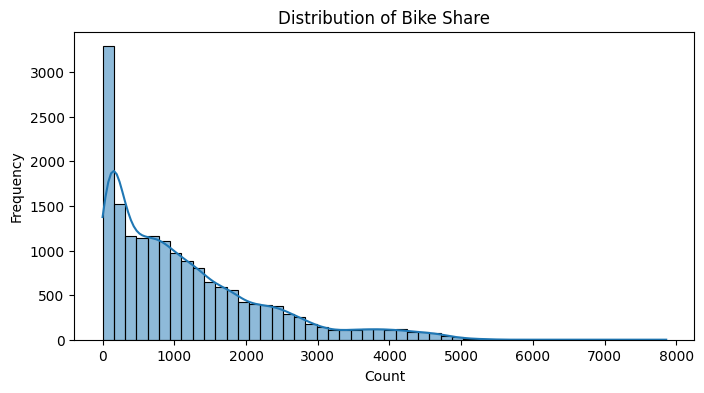

In [17]:
#Toplam bisiklet sayısının dağılımı

sns.histplot(df['total_count'], bins=50, kde=True) 
plt.title('Distribution of Bike Share') 
plt.xlabel('Count') 
plt.ylabel('Frequency') 
plt.show()

In [18]:
df.groupby("season")["total_count"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,5322,0,1103.831589
1.0,7860,12,1464.465238
2.0,5422,9,1178.954218
3.0,4415,10,821.729099


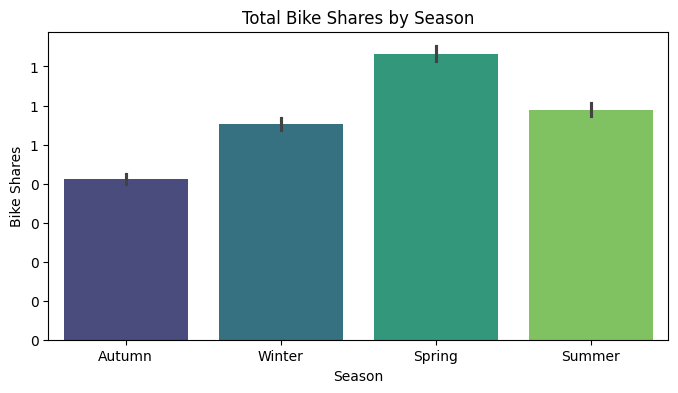

In [19]:
# Bisiklet paylaşımını mevsime göre çubuk grafik olarak çizme
plt.figure(figsize=(8, 4))

season_labels = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}

sns.barplot(x=df['season'].replace(season_labels), y='total_count', data=df, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Bike Shares')
plt.title('Total Bike Shares by Season')

# y-axis labels
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label/1000)}' for label in y_labels])

plt.show()

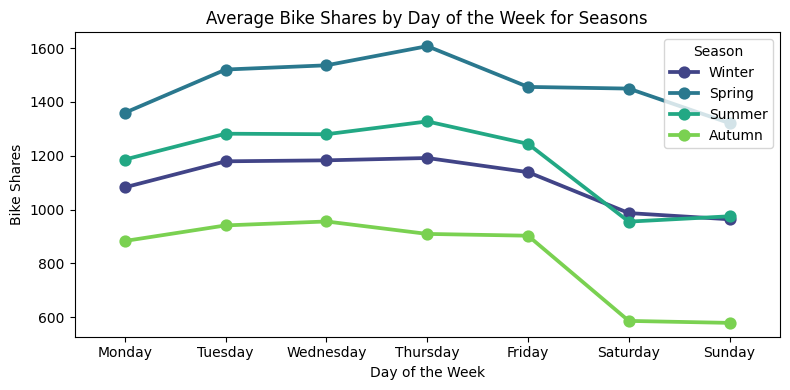

In [20]:
# Sezonlara göre hafta içi bisiklet paylaşım sayısı

plt.figure(figsize=(8, 4))
# Define the season and day of the week labels
season_labels = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregating the data by season and day of the week
daily_seasonal_data = df.groupby(['season', 'day_of_week'])['total_count'].mean().reset_index()

# Creating the point plot without adding a new column
sns.pointplot(x='day_of_week', y='total_count', hue=daily_seasonal_data['season'].replace(season_labels), data=daily_seasonal_data, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares')
plt.title('Average Bike Shares by Day of the Week for Seasons')

# Update the x-axis labels to show the days of the week
plt.xticks(ticks=range(7), labels=day_labels)

plt.legend(title='Season')
plt.tight_layout()
plt.show()

### Feature Selection

In [22]:
# Scaling numerical features using the `StandardScaler()` function.

from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[numerical_features])

df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

In [23]:
df_scaled.head()

,total_count,temp,feel_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,-0.885745,-1.699331,-1.439290,1.444517,-1.255717,0.118427,-0.150161,1.582347,1.347711
1,-0.926295,-1.699331,-1.363703,1.444517,-1.382390,-0.735874,-0.150161,1.582347,1.347711
2,-0.929982,-1.789071,-1.363703,1.689054,-2.015755,-0.735874,-0.150161,1.582347,1.347711
3,-0.987120,-1.878811,-1.439290,1.933590,-2.015755,-0.735874,-0.150161,1.582347,1.347711
4,-1.010160,-1.878811,-1.741635,1.444517,-1.192381,-0.735874,-0.150161,1.582347,1.347711


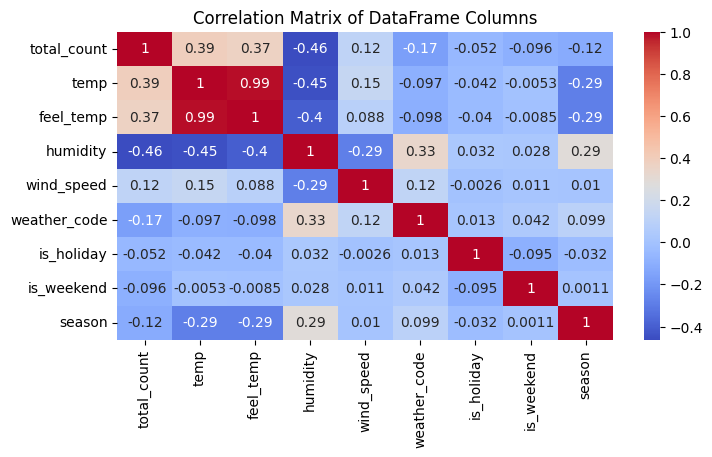

In [24]:
correlation_matrix = df_scaled.iloc[:,0:9].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of DataFrame Columns')
plt.show()

## Model Training

In [26]:
x = df.drop(['total_count','timestamp'], axis=1)
y = df['total_count']

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
x=sc.fit_transform(x) # datayi scalar ettik

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()

model=dr.fit(x_train, y_train)

In [33]:
tahmin = model.predict(x_test)

In [34]:
from sklearn.metrics import r2_score # barasi oranini ölcüyoruz

In [35]:
r2_score(tahmin,y_test)

0.9374864163113448

In [36]:
mse = mean_squared_error(y_test, tahmin)
print(f"Mean Squared Error: {mse}")

NameError: name 'mean_squared_error' is not defined

## Visualize the Performance

In [ ]:
plt.figure(figsize=(8, 4))
# Scatter plot: Actual vs Predicted
plt.scatter(y_test, tahmin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bike Shares')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
# Histogram: Distribution of prediction errors
errors = y_test - tahmin

sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

## ÖZET